# Introduction

Healthcare is one of the extremely important services of a nation to keep their population healthy and working for the economy to boom. Lack of healthcare or the collapse of healthcare can lead to massive implications for a country's development. This is the reason as to why every goverment of every country spends billions of dollars to improve and keep their healthcare functioning so as to give the general population affordable healthcare options.

However, challenges faced by a country such as India are far more complicated than the rest of the world. A country with 1.33 billion people with sizeable population living in the remote areas make it a very tough task for everyone to be provided with equal and afforable healthcare oppoptunities. Many poor people need to travel thousands of KMs to get the required healthcare. Another issue faced by healthcares due to the increasing population is the lack of beds and healthcare personnel. This has been especially observed during the tough times of COVID-19 where people with even mild symptoms would flock in big numbers at the goverment healthcare facilities making it extremely tough for the officials to manage the patients.

Innovative methods must be sought after so that the officials can be able to forecast the traffic of patients. Judging the health problems, we can come up with a ML algorithm that can predict how long would a patient require hospitalisation. If the algorithm can help the officials get a ballpark value of hospitalisation period, they'll be able to handle the traffic of patients much better.

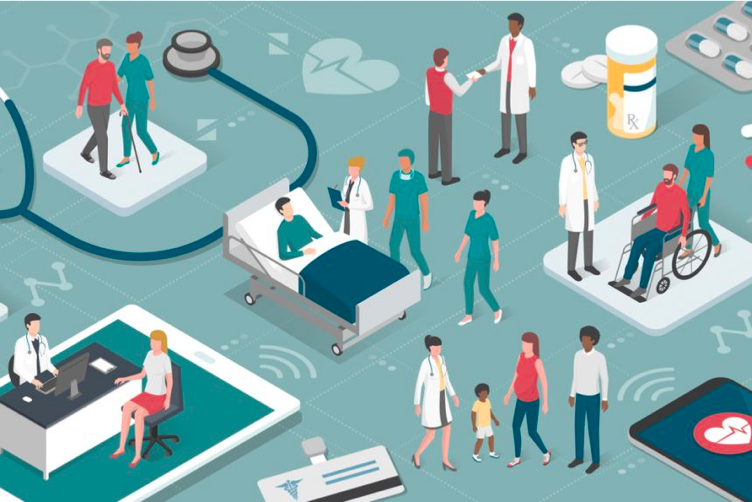

# 1. Importing datasets and relevant libraries

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px
import plotly
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
plotly.offline.init_notebook_mode (connected = True)

In [ ]:
df=pd.read_csv('../input/av-healthcare-analytics-ii/healthcare/train_data.csv')
df['Count']=1
df.head()

As we can see, we have numerous columns showing information such as hospital code, hospital type code and many other such identifiers. While a detailed documentation is not available as to what these codes mean, we will preserve them as they could provide great insight for our machine learning.

In [ ]:
df.info()

## Heatmap for missing values

In [ ]:
sns.heatmap(df.isna(),cmap='gnuplot')

In [ ]:
df.isna().any()

As we can see, most of columns don't have any missing values associated to them. This is a very good sign that we are dealing with pre processed data.

# 2. Data Visualisations

Here, we shall emphasise on the EDA with the available data to find out some key insights.

## Hospital type code

Let us check which code of hospitals have the highest patient density.

In [ ]:
df_hos_code=df.groupby('Hospital_type_code')['Count'].sum().reset_index().sort_values(by='Count',ascending=False)

In [ ]:
fig1=px.bar(df_hos_code,x='Hospital_type_code',y='Count',color='Count',labels={'Hospital_type_code':'Hospital Type Code','Count':'Number of patients'})
fig1.update_layout(title='Patient distribution per hospital type code',title_x=0.5,template='plotly_dark')
fig1.show()

As we can see, the hospital type **A** has a much higher patient case load when in comparison any of the other hospital codes. Hospital type **G** has the least case load. Hence, hospital type A has a much higher likelihood of running out of patient beds while G has the least. The ideal distribution would've been a uniform distribution where the under utilised beds of other hospital type codes may have been equally utilised.

## Hospital region code

The region code would likely divide all the available hospitals into three regions encoded as X,Y and Z. This will again let us know which hospital type belongs to which region and their corresponding case loads as well.

In [ ]:
fig2=px.sunburst(df,path=['Hospital_region_code','Hospital_type_code'])
fig2.update_layout(title='Hospital region case load distribution',title_x=0.5)
fig2.show()

As we can see from the above sunburst plot, the case loads in hospital region **X** is marginally higher than hospital region **Y** and the least in region **Z** .  For region X, the hospital type A had highest case load while it was more equally balanced between a and b in region Y. For region Z, highest case loads were in hospital type C. Hospitals in region X seem to show better distribution amogst all the hospital types.

For region Y, distribution between A and B is ideal but f,d and g have been under utilised. For Z, cases in hospital c were easily the highest but a and d are extremely under utilised.

## Available Extra Rooms in Hospital

This is an important indicator as to how the hospital is coping with the case loads. Let us check how the extra rooms are distributed across the various hospitals.

In [ ]:

fig3=px.histogram(df,x='Available Extra Rooms in Hospital',marginal='box',color_discrete_sequence=['orange'],opacity=0.7)
fig3.update_layout(template='plotly_dark',title='Number of hospitals with extra rooms',title_x=0.5)
fig3.show()

As we can see from the above histogram, majority of hospitals have extra rooms in the size of 2,3 or 4 rooms. The median extra rooms is 3.


## Available rooms Vs Region code

Let us check which region of X,Y and Z have most number of extra rooms available to them. Ideally, they should have a uniform distribution showing equal case loads. Let us check what the data says.

In [ ]:
df_beds=df[['Hospital_code','Available Extra Rooms in Hospital','Hospital_region_code']]
df_beds['Hospital_region_code']=df_beds['Hospital_region_code'].map({'X':1,'Y':2,'Z':3})
df_beds_grouped=df_beds.groupby('Hospital_code')[['Available Extra Rooms in Hospital','Hospital_region_code']].median().reset_index()


In [ ]:
df_beds_grouped['Hospital_region_code']=df_beds_grouped['Hospital_region_code'].map({1:'X',2:'Y',3:'Z'})
df_beds_grouped.head()

In [ ]:
df_beds_1=df_beds_grouped.groupby('Hospital_region_code')['Available Extra Rooms in Hospital'].sum().reset_index()
fig4=px.pie(df_beds_1,values='Available Extra Rooms in Hospital',names='Hospital_region_code',hole=0.4)
fig4.update_layout(title='Number of extra rooms in each region code',title_x=0.5)
fig4.update_traces(textinfo='percent+label')

From the above pie chart, we see that the number of extra available rooms are almost equally distributed amongst the three region codes. This is an ideal scenario.

## Department

Here, we shall check which departments have the highest number of case loads.


In [ ]:
df_dept=df.groupby('Department')['Count'].sum().reset_index().sort_values(by='Count',ascending=False)


In [ ]:
fig5=px.bar(df_dept,x='Department',y='Count',color='Department',labels={'Count':'Number of patients'})
fig5.update_layout(title='Case load distribution per department',title_x=0.5,template='plotly_dark')
fig5.show()

From the above bar plot, we see that majority of the patients register themselves at the gynecology department. Surgery department has the least number of case loads. This is expected as daily birth cases are far higher than daily surgeries.


## Severity of illness

Let us check the number of patients of each severity of illness.

In [ ]:
df_sev=df.groupby('Severity of Illness')['Count'].sum().reset_index().sort_values(by='Count',ascending=False)
fig6=px.funnel(df_sev,x='Count',y='Severity of Illness',labels={'Count':'Number of patients'},color='Count')
fig6.update_layout(title='Case load depending upon severity of illness',title_x=0.5,template='plotly_dark')
fig6.show()

From the above funnel plot, we see that most numner of cases are moderate in nature followed by minor and then, extreme.


## Age Vs Severity of illness

Let us check if there's any relation amongst age and severity of illness

In [ ]:
fig7=px.sunburst(df,path=['Age','Severity of Illness'])
fig7.update_layout(title='Age (in years) and Severity of Illness',title_x=0.5)
fig7.show()

As we can see from the sunburst plot above, extreme cases are least for each age group. However, the extreme cases in relation to the moderate and minor cases seem to increase with higher age groups.


## Severity of illness Vs Stay

Let us check how the severity of illness and stay period changes.


In [ ]:
fig8=px.sunburst(df,path=['Stay','Severity of Illness'])
fig8.update_layout(title='Stay period (in days) vs Severity of illness',title_x=0.5)
fig8.show()

From the above plot, it is seen that generally for lower stay duration(upto 20 days), the severity of illness is majorly minor or moderate. For higher stay duration, the extreme severity cases start rising.

21-30 days and 11-20 days are the most common stay periods across the hospitals.


# 3. Data wrangling

As we can see, we have a lot of data available to us. Some of these data provide us useful information while the other portion doesn't. A portion of the data is not numerical and for this purpose, we will have to wrangle with the data to either label encode or one hot encode them. 

In [ ]:
df.head()

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
le=LabelEncoder()
df['Hospital_type_code_cat']=le.fit_transform(df['Hospital_type_code'])

In [ ]:
df_reg_codes=pd.get_dummies(df['Hospital_region_code'])

df=pd.merge(df,df_reg_codes,on=df.index)

In [ ]:
df.drop('key_0',axis=1,inplace=True)

In [ ]:
df_dept=pd.get_dummies(df['Department'])
df=pd.merge(df,df_dept,on=df.index)
df.drop('key_0',axis=1,inplace=True)

In [ ]:
df['Ward_Type_cat']=le.fit_transform(df['Ward_Type'])
df['Ward_Facility_Code_cat']=le.fit_transform(df['Ward_Facility_Code'])

In [ ]:
df_adm=pd.get_dummies(df['Type of Admission'])
df=pd.merge(df,df_adm,on=df.index)
df.drop('key_0',axis=1,inplace=True)
df_sev_ill=pd.get_dummies(df['Severity of Illness'])
df=pd.merge(df,df_sev_ill,on=df.index)
df.drop('key_0',axis=1,inplace=True)

In [ ]:
df['Age_cat']=le.fit_transform(df['Age'])
df['Stay_cat']=le.fit_transform(df['Stay'])

Now that we've either label encoded or one-hot encoded all the data, let us remove the previous categorical columns from the dataframe.

In [ ]:
df_train=df.copy()

In [ ]:
unn_cols=['case_id','Hospital_type_code','Hospital_region_code','Department','Ward_Type',
          'Ward_Facility_Code','Type of Admission','Severity of Illness','Age','Stay',
          'Count','Admission_Deposit','Bed Grade','City_Code_Patient']

for cols in unn_cols:
    df_train.drop(cols,axis=1,inplace=True)

In [ ]:
df_train.info()

As we can see, all the available data is now in numerical form and hence, can be used for ML algorithms. Let us check the correlation of each feature with each other through a heatmap.

In [ ]:
correlations=df_train.corr()
plt.figure(figsize=(20,10))
sns.heatmap(correlations,cmap='summer',annot=True,fmt='.2g')

# 4. Machine Learning


In this section, we shall apply some of the ML algorithms for correct classfication.

## Training phase

## a) Logistic Regression

In [ ]:
target=df_train['Stay_cat']
train_df=df_train.iloc[:,:-1]

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
reg_log=LogisticRegression()

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(train_df,target,test_size=0.3,shuffle=True,random_state=0)


In [ ]:
reg_log.fit(X_train,y_train)

In [ ]:
reg_log.score(X_train,y_train)

In [ ]:
y_predict_log=reg_log.predict(X_test)
reg_log.score(X_test,y_test)

As we can see, the logistic regression has performed extremely poorly with only 28 % accuracy. Let us check another algorithm.


## b) Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rfc=RandomForestClassifier(max_depth=10,random_state=0)

In [ ]:
rfc.fit(X_train,y_train)
rfc.score(X_train,y_train)

In [ ]:
y_preds_rfc=rfc.predict(X_test)
rfc.score(X_test,y_test)

We can see that the scores for Random Forest Classifier are better than logistic regression for a pre pruned max_depth of 10.


## c) CatBoost



In [ ]:
from catboost import CatBoostClassifier

In [ ]:
cb_clf=CatBoostClassifier(iterations=800,
                           learning_rate=0.08,
                           depth=8,
                           loss_function='MultiClass',
                           eval_metric='Accuracy')

In [ ]:
cb_clf.fit(X_train,y_train)
cb_clf.score(X_train,y_train)

In [ ]:
y_preds_cb=cb_clf.predict(X_test)
cb_clf.score(X_test,y_test)

As we can see, catboost seems to have done well at classifying the results better than the other algorithms. We shall use this for our test dataframe.

## Testing phase

In [ ]:
df_test=pd.read_csv('../input/av-healthcare-analytics-ii/healthcare/test_data.csv')
df_test.head()

id_df=df_test['patientid']

In [ ]:
df_test['Hospital_type_code_cat']=le.fit_transform(df_test['Hospital_type_code'])
df_reg_codes=pd.get_dummies(df_test['Hospital_region_code'])
df_test=pd.merge(df_test,df_reg_codes,on=df_test.index)
df_test.drop('key_0',axis=1,inplace=True)
df_dept=pd.get_dummies(df_test['Department'])
df_test=pd.merge(df_test,df_dept,on=df_test.index)
df_test.drop('key_0',axis=1,inplace=True)

df_test['Ward_Type_cat']=le.fit_transform(df_test['Ward_Type'])
df_test['Ward_Facility_Code_cat']=le.fit_transform(df_test['Ward_Facility_Code'])

df_adm=pd.get_dummies(df_test['Type of Admission'])
df_test=pd.merge(df_test,df_adm,on=df_test.index)
df_test.drop('key_0',axis=1,inplace=True)
df_sev_ill=pd.get_dummies(df_test['Severity of Illness'])
df_test=pd.merge(df_test,df_sev_ill,on=df_test.index)
df_test.drop('key_0',axis=1,inplace=True)


df_test['Age_cat']=le.fit_transform(df_test['Age'])


In [ ]:
unn_cols=['Hospital_type_code','Hospital_region_code','Department','Ward_Type',
          'Ward_Facility_Code','Type of Admission','Severity of Illness','Age',
          'Admission_Deposit','Bed Grade','City_Code_Patient']

for cols in unn_cols:
    df_test.drop(cols,axis=1,inplace=True)

In [ ]:
df_test=df_test[['Hospital_code', 'City_Code_Hospital',
       'Available Extra Rooms in Hospital', 'patientid',
       'Visitors with Patient', 'Hospital_type_code_cat', 'X', 'Y', 'Z',
       'TB & Chest disease', 'anesthesia', 'gynecology', 'radiotherapy',
       'surgery', 'Ward_Type_cat', 'Ward_Facility_Code_cat', 'Emergency',
       'Trauma', 'Urgent', 'Extreme', 'Minor', 'Moderate', 'Age_cat']]

In [ ]:
y_preds=cb_clf.predict(df_test)

We now need to convert the numerical stay data into categorical data.

In [ ]:
df['Stay_cat']=le.fit_transform(df['Stay'])
y_final=le.inverse_transform(y_preds)

In [ ]:
sample_df=pd.read_csv('../input/av-healthcare-analytics-ii/healthcare/sample_sub.csv')
df_final=pd.DataFrame(sample_df.iloc[:,0],columns=['case_id'])
df_final['Stay']= y_final

In [ ]:
final_sub=df_final.to_csv('Catboost predictions',index=False)

# Conclusion


It was seen that from the available data, about 42 % of the cases could be correctly classified. While this is not a very high value, it could definitely mean a situation of life and death maybe avoided by allowing a patient to reach a hospital which definitely has free beds available. 